# Import thư viện

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Đọc dữ liệu

blobs là dữ liệu gốc

In [75]:
blobs=pd.read_csv('data.csv')
colnames=list(blobs.columns[1:-1])
blobs.head()

,ID,x,y,cluster
0,0,24.412,32.932,2
1,1,35.190,12.189,1
2,2,26.288,41.718,2
3,3,0.376,15.506,0
4,4,26.116,3.963,1


df là dữ liệu gồm 2 điểm x, y

In [76]:
df=blobs[['x','y']]
df.head()

,x,y
0,24.412,32.932
1,35.190,12.189
2,26.288,41.718
3,0.376,15.506
4,26.116,3.963


# Set màu để vẽ biểu đồ

In [77]:
customcmap=ListedColormap(["crimson","mediumblue","darkmagenta"])

# Hàm khởi tạo medoids ngẫu nhiên

In [78]:
def initiate_medoids(k,dset):
    medoids=dset.sample(k)
    return medoids

# Hàm tính khoảng cách manhattan (chuẩn 1)

In [79]:
def rerr(a,b):
    # return np.square(np.sum((a-b)**2))
    return np.linalg.norm(a-b,ord=1)


# Hàm gán medoid

In [80]:
def medoid_assignation(dset, medoids):
    # Số  medoid
    k = medoids.shape[0]

    # Số samples trong tập dữ liệu
    n = dset.shape[0]

    assignation = []

    assign_errors = []

    for obs in range(n):
        # List error cho từng medoid
        all_errors = np.array([])

        # Tính error cho từng medoid
        for medoid in range(k):
            err = rerr(medoids.iloc[medoid, :], dset.iloc[obs, :])
            all_errors = np.append(all_errors, err)

        # Chọn medoid gần nhất 
        nearest_medoid = np.where(all_errors == np.amin(all_errors))[0].tolist()[0]
        nearest_medoid_error = np.amin(all_errors)

        assignation.append(nearest_medoid)
        assign_errors.append(nearest_medoid_error)

    return assignation, assign_errors


# Hàm vẽ dữ liệu 

In [81]:
def plot_cluster(df, medoids):
    # Số medoid
    k = medoids.shape[0]

    # Tạo figure và axes cho đồ thị
    fig, ax = plt.subplots(figsize=(8, 6))

    # Vẽ các quan sát và gán nhãn màu sắc dựa trên medoid
    # plt.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='o', c=df['medoid'].astype('category'), cmap=customcmap.resampled(k), s=80, alpha=0.5)
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='o', c=df['medoid'].astype('category'), cmap='cool', s=80, alpha=0.5)

    # Vẽ các medoid
    # scatter = plt.scatter(medoids.iloc[:, 0], medoids.iloc[:, 1], marker='s', s=200, c=[i for i in range(k)], cmap=customcmap.resampled(k))
    scatter = plt.scatter(medoids.iloc[:, 0], medoids.iloc[:, 1], marker='s', s=200, c=[i for i in range(k)], cmap='cool')

    ax.set_xlabel(r'x', fontsize=14)
    ax.set_ylabel(r'y', fontsize=14)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Tạo chú thích cho các medoid
    legend_labels = [f'medoid {i} : ({medoids.iloc[i, 0]:.2f}, {medoids.iloc[i, 1]:.2f})' for i in range(k)]
    plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='medoids')

    # Trả về axes để có thể thực hiện các tác vụ khác trên đồ thị
    return ax


# Hàm thuật toán chính kmedian

In [82]:
def kmedian(dset, k=2, tol=1e-4, init_medoids=None, show_plot=True):
    # Tạo bản sao để tránh thay đổi data gốc
    working_dset = dset.copy()

    # Danh sách error cho từng bước lặp
    err = []

    # Biến điều kiện để tiếp tục vòng lặp
    goahead = True

    # Biến đếm số lần lặp
    j = 0

    # Nếu không cho trước medoids thì sử dụng hàm initiate_medoids để khởi tạo
    if init_medoids is None:
        init_medoids = initiate_medoids(k, working_dset)
    
    # Gán giá trị khởi tạo cho medoids
    medoids = init_medoids

    while goahead:
        # Gán medoid và tính error cho các quan sát
        working_dset['medoid'], j_err = medoid_assignation(working_dset.iloc[:, :2], medoids)

        # Tính tổng error và vẽ đồ thị
        err.append(sum(j_err))
        if show_plot is True:
            ax = plot_cluster(working_dset, medoids)
            ax.set_title(f'Iteration {j}')
            plt.show()

        # Tính các medoid mới dựa trên các quan sát đã gán nhãn
        medoids = working_dset.groupby('medoid').agg('median').reset_index(drop=True)

        if j > 0:
            if err[j-1] - err[j] <= tol:
                goahead = False

        j += 1

    return working_dset['medoid'], j_err, medoids


# Chạy thuật toán kmedian

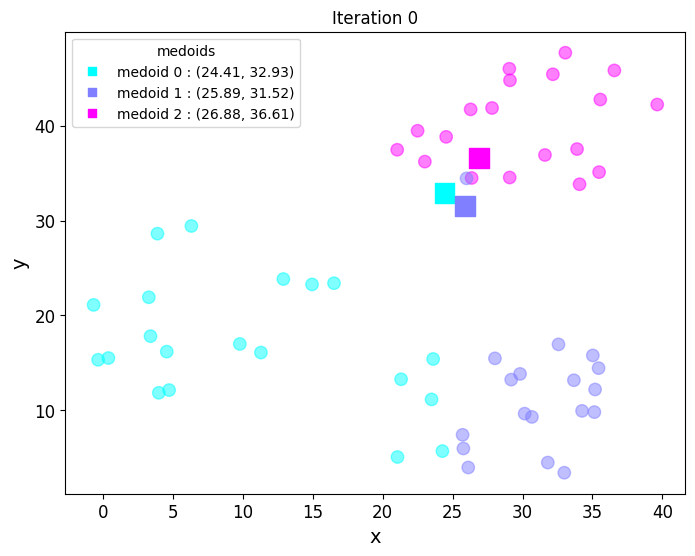

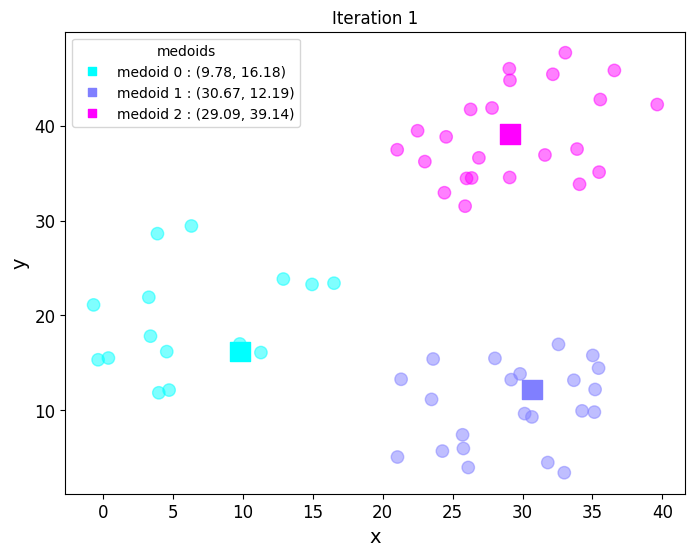

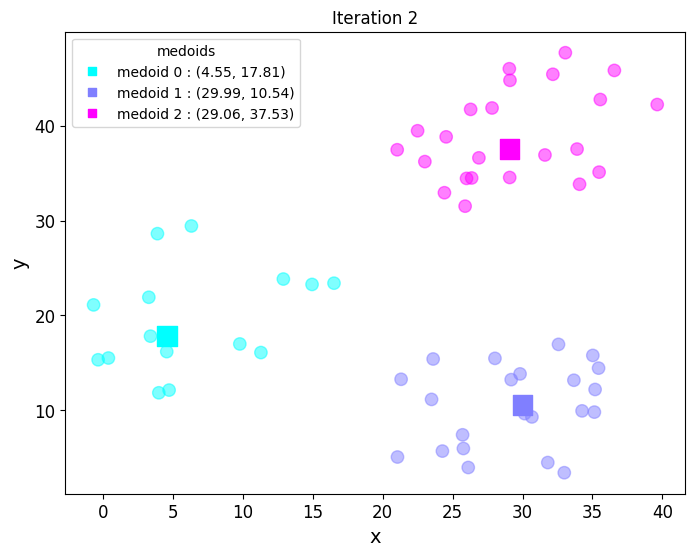

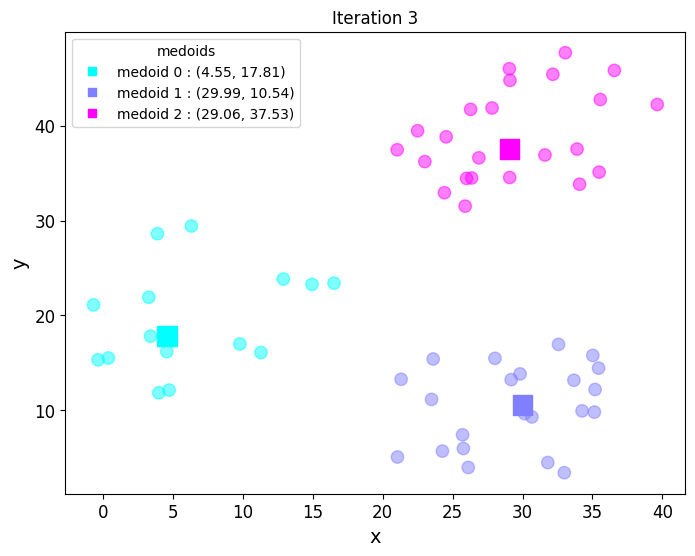

C:\Users\votua\AppData\Local\Temp\ipykernel_13656\656488633.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['medoid'],df['error'],medoids=kmedian(df[['x','y']],k=3,init_medoids=init_medoids)


In [83]:
np.random.seed(42)
init_medoids=initiate_medoids(3,df)
df['medoid'],df['error'],medoids=kmedian(df[['x','y']],k=3,init_medoids=init_medoids)

# Medoids cuối cùng 

In [84]:
medoids

,x,y
0,4.550,17.8100
1,29.986,10.5365
2,29.056,37.5350


# Kiểm tra với cluster cho trước 

In [85]:
(blobs['cluster']==df['medoid']).value_counts()

True    60
Name: count, dtype: int64

# Sử dụng elbow method tìm ra số cụm tối ưu

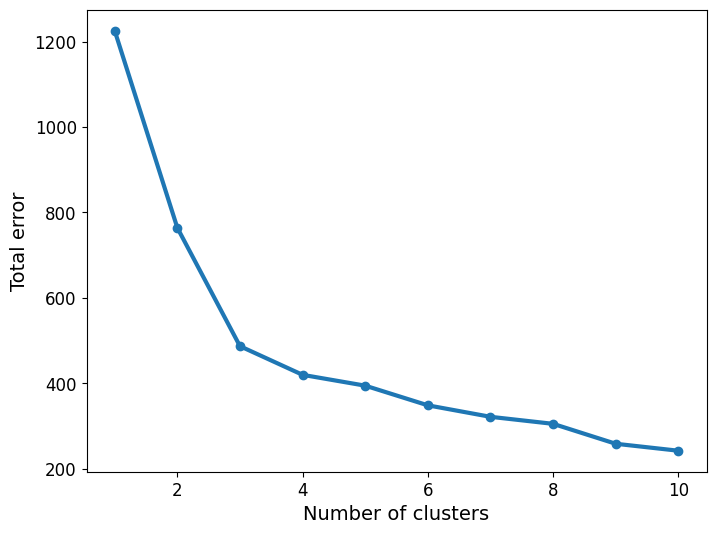

In [86]:
err_total=[]
n=10
df_elbow=blobs[['x','y']]
for i in range(n):
    _,my_errs,_=kmedian(df_elbow,k=i+1,show_plot=False)
    err_total.append(sum(my_errs))

fig,ax=plt.subplots(figsize=(8,6))
plt.plot(range(1,n+1),err_total,linewidth=3,marker='o')
ax.set_xlabel(r'Number of clusters',fontsize=14)
ax.set_ylabel(r'Total error',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Có thể thấy điểm elbow = 3, vậy số cụm tối ưu là 3

# Kiểm tra với ví dụ về thuật toán kmedian trong file pdf

In [87]:
df=pd.DataFrame(data={'x':[1,2,2,3,4,5],'y':[1,1,3,2,3,5]})
df

,x,y
0,1,1
1,2,1
2,2,3
3,3,2
4,4,3
5,5,5


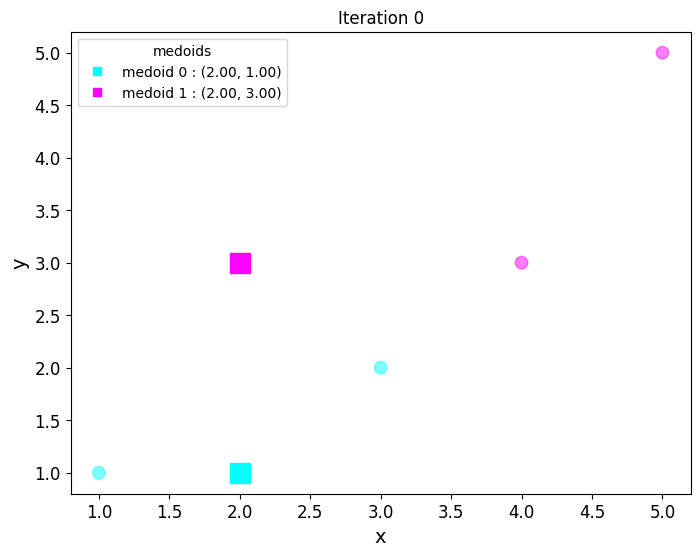

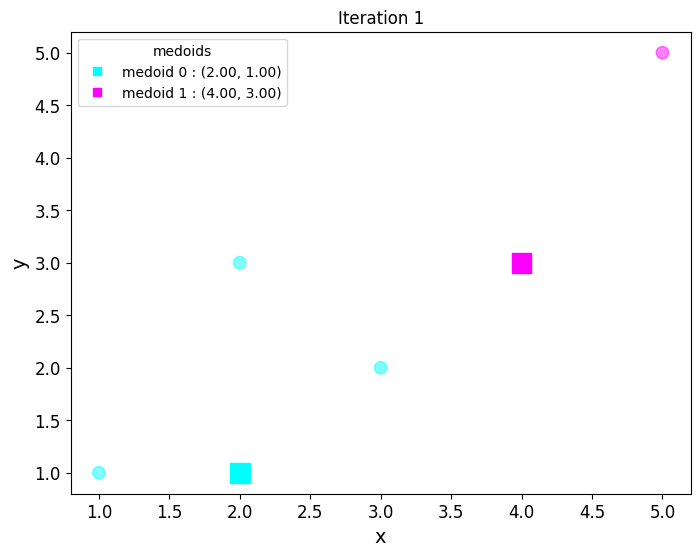

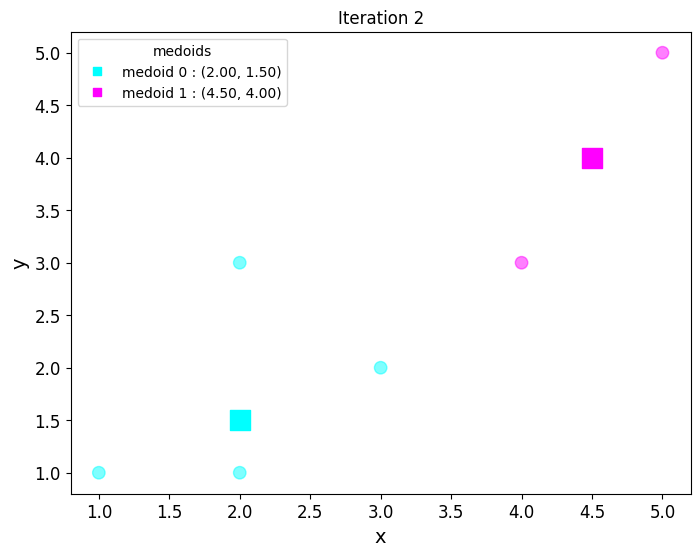

In [88]:
init_medoids=pd.DataFrame({'x':[2,2],'y':[1,3]})
df['medoid'],df['error'],medoids=kmedian(df,k=2,init_medoids=init_medoids)

# Medoid cuối cùng

In [89]:
medoids

,x,y
0,2.0,1.5
1,4.5,4.0


In [90]:
df

,x,y,medoid,error
0,1,1,0,1.5
1,2,1,0,0.5
2,2,3,0,1.5
3,3,2,0,1.5
4,4,3,1,1.5
5,5,5,1,1.5


# Ta thấy kết quả giống với kết quả trong file pdf